In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# custom imports
import wrangle
import prepare

# Exercises

- Our Zillow scenario continues:

<div class="alert alert-success" role="alert">

### As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.
</div>

- In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

## 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

In [2]:
df = wrangle.wrangle_zillow()
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [3]:
train, val, test = prepare.train_val_test(df)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498164 entries, 1001601 to 1692743
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1498164 non-null  int64  
 1   bathrooms   1498164 non-null  float64
 2   area        1498164 non-null  int64  
 3   tax_value   1498164 non-null  int64  
 4   year_built  1498164 non-null  int64  
 5   tax_amount  1498164 non-null  float64
 6   fips        1498164 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 91.4 MB


## 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

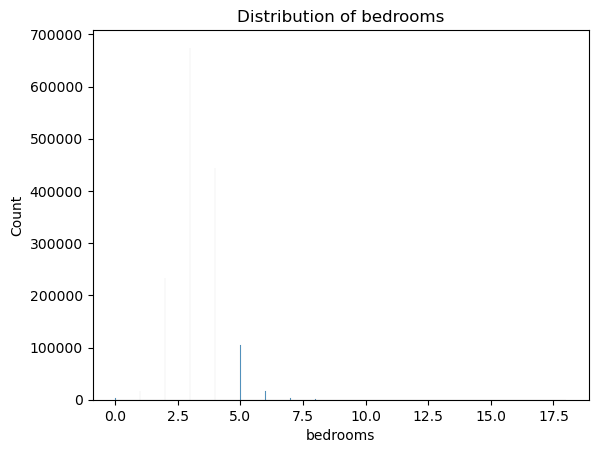

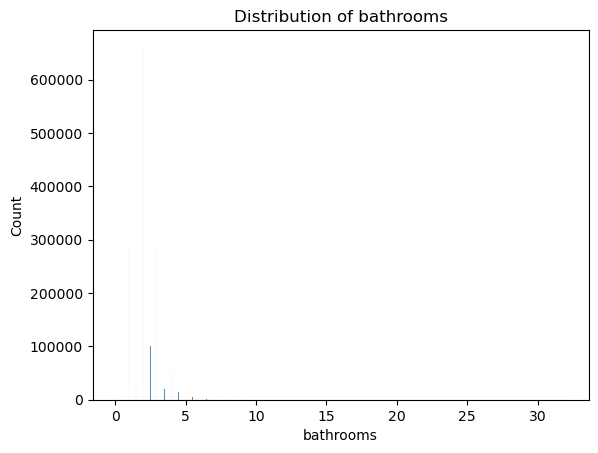

In [ ]:
for col in train.columns[train.dtypes != 'object']:

    plt.figure()
    sns.histplot(data = train, x = col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
for col in train.columns[train.dtypes == 'object']:

    plt.figure()
    sns.countplot(data = train, x = col)
    plt.title(f'Count of {col}')
    plt.show()

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [ ]:
train.head()

In [ ]:
train = train.sample(100)

In [ ]:
def plot_variable_pairs(df):
  """
  This function plots all of the pairwise relationships along with the regression line for each pair.

  Args:
    df: The dataframe containing the data.

  Returns:
    None.
  """

  for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
      plt.figure()
      plt.scatter(df[df.columns[i]], df[df.columns[j]])
      plt.bar(df[df.columns[i]], df[df.columns[j]].mean(), color='green')
      plt.title('Scatter plot of {} vs {}'.format(df.columns[i], df.columns[j]))
      plt.show()

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
def plot_categorical_and_continuous_vars(df, continuous_var, categorical_var):
    """
    This function outputs three different plots for visualizing a categorical variable and a continuous variable.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        continuous_var (str): The name of the column that holds the continuous feature.
        categorical_var (str): The name of the column that holds the categorical feature.

    Returns:
        None.
    """

    # Create subplots with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Box plot of the continuous variable for each category of the categorical variable
    sns.boxplot(x=categorical_var, y=continuous_var, data=df, ax=axes[0])
    axes[0].set_title('Box plot of {} for each category of {}'.format(continuous_var, categorical_var))

    # Violin plot of the continuous variable for each category of the categorical variable
    sns.violinplot(x=categorical_var, y=continuous_var, data=df, ax=axes[1])
    axes[1].set_title('Violin plot of {} for each category of {}'.format(continuous_var, categorical_var))

    # Histogram of the continuous variable for each category of the categorical variable
    for cat in df[categorical_var].unique():
        sns.histplot(df[df[categorical_var] == cat][continuous_var], ax=axes[2], label=cat, kde=True)
    axes[2].set_title('Histogram of {} for each category of {}'.format(continuous_var, categorical_var))
    axes[2].legend(title=categorical_var)

    plt.tight_layout()
    plt.show()

**3 Categorical values:**

bedrooms, bathrooms, fips


**4 Continuous Values:**

area, tax_value, year_built, tax_amount

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
# reimported my libs per step 5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# custom imports *added explore.py containing my functions above?
import wrangle
import prepare
import explore

## 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [ ]:
explore.plot_variable_pairs(train)

In [ ]:
plot_categorical_and_continuous_vars(train, 'area', 'bedrooms')

## 7. Come up with some initial hypotheses based on your goal of predicting property value.

## 8. Visualize all combinations of variables in some way.

## 9. Run the appropriate statistical tests where needed.

## 10. What independent variables are correlated with the dependent variable, home value?

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

## 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## 13. Explore your dataset with any other visualizations you think will be helpful.

# Bonus Exercise

## 14. In a seperate notebook called explore_mall, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.